<a href="https://colab.research.google.com/github/Neha-M333/Deep_learning/blob/main/Market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [88]:
number_of_items = np.arange(1, 1000)
number_of_simple_rules = number_of_items*(number_of_items-1)

df_number_simple_association_rules = pd.DataFrame({'Number of Items':number_of_items,'Number of Simple Rules':number_of_simple_rules})
df_number_simple_association_rules.head(10)

,Number of Items,Number of Simple Rules
0,1,0
1,2,2
2,3,6
3,4,12
4,5,20
5,6,30
6,7,42
7,8,56
8,9,72
9,10,90


<Axes: title={'center': 'Number of Simple Association Rules per Number of Items'}, xlabel='Number of Items', ylabel='Number of Simple Rules'>

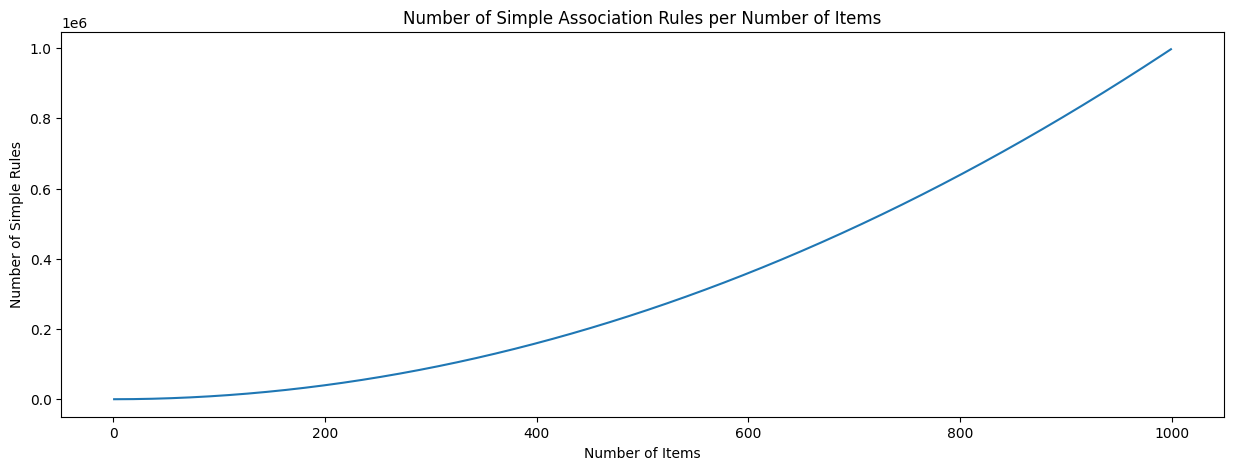

In [89]:
plt.figure(figsize=(15,5))
plt.title("Number of Simple Association Rules per Number of Items")
sns.lineplot(data = df_number_simple_association_rules, x='Number of Items', y='Number of Simple Rules')


In [90]:

df_bakery = pd.read_csv('/content/bakery_transaction_list_without_filter_4_B.csv')
df_bakery.head()

,TransactionId,Transaction
0,0,"croissant,coffee"
1,1,"croissant,brownie"
2,2,"brownie,croissant"
3,3,"sausage bread,coffee"
4,4,"orange juice,croissant"


In [91]:
df_bakery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionId  298 non-null    int64 
 1   Transaction    298 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [92]:

transactions = df_bakery['Transaction'].apply(lambda t: t.split(','))
transactions = list(transactions)
items_list = [item for transaction in transactions for item in transaction]
items_list = list(set(items_list))
items_list

['sausage bread',
 'brownie',
 'coffee',
 'croissant',
 'cookie',
 'pain au chocolat',
 'orange juice']

In [93]:
rules = list(permutations(items_list, 2))
print(rules)
print("\nNumber of Simple Association Rules:", len(rules))

[('sausage bread', 'brownie'), ('sausage bread', 'coffee'), ('sausage bread', 'croissant'), ('sausage bread', 'cookie'), ('sausage bread', 'pain au chocolat'), ('sausage bread', 'orange juice'), ('brownie', 'sausage bread'), ('brownie', 'coffee'), ('brownie', 'croissant'), ('brownie', 'cookie'), ('brownie', 'pain au chocolat'), ('brownie', 'orange juice'), ('coffee', 'sausage bread'), ('coffee', 'brownie'), ('coffee', 'croissant'), ('coffee', 'cookie'), ('coffee', 'pain au chocolat'), ('coffee', 'orange juice'), ('croissant', 'sausage bread'), ('croissant', 'brownie'), ('croissant', 'coffee'), ('croissant', 'cookie'), ('croissant', 'pain au chocolat'), ('croissant', 'orange juice'), ('cookie', 'sausage bread'), ('cookie', 'brownie'), ('cookie', 'coffee'), ('cookie', 'croissant'), ('cookie', 'pain au chocolat'), ('cookie', 'orange juice'), ('pain au chocolat', 'sausage bread'), ('pain au chocolat', 'brownie'), ('pain au chocolat', 'coffee'), ('pain au chocolat', 'croissant'), ('pain au 

In [94]:
def onehot_encode_transactions(transactions_column):


    transactions = transactions_column.apply(lambda t: str(t).split(','))
    encoder = TransactionEncoder().fit(transactions)
    onehot = encoder.transform(transactions)
    onehot = pd.DataFrame(onehot, columns = encoder.columns_)
    return onehot

In [95]:
onehot_bakery = onehot_encode_transactions(df_bakery['Transaction'])
onehot_bakery

,brownie,coffee,cookie,croissant,orange juice,pain au chocolat,sausage bread
0,False,True,False,True,False,False,False
1,True,False,False,True,False,False,False
2,True,False,False,True,False,False,False
3,False,True,False,False,False,False,True
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
293,True,True,False,False,True,True,False
294,True,False,False,True,True,False,True
295,True,False,True,True,True,False,False
296,False,False,True,True,False,True,True


In [96]:
support = onehot_bakery.mean()
support.sort_values(ascending=False)

,0
croissant,0.402685
pain au chocolat,0.399329
orange juice,0.395973
brownie,0.379195
coffee,0.375839
cookie,0.345638
sausage bread,0.328859


In [97]:
for item in ['croissant', 'cookie', 'pain au chocolat', 'sausage bread', 'brownie']:
    onehot_bakery['coffee'+' '+item] = np.logical_and(onehot_bakery['coffee'], onehot_bakery[item])
    onehot_bakery['orange juice'+' '+item] = np.logical_and(onehot_bakery['orange juice'], onehot_bakery[item])


In [98]:
support = onehot_bakery.mean()
support.sort_values(ascending=False)

,0
croissant,0.402685
pain au chocolat,0.399329
orange juice,0.395973
brownie,0.379195
coffee,0.375839
cookie,0.345638
sausage bread,0.328859
coffee pain au chocolat,0.144295
orange juice brownie,0.137584
coffee brownie,0.137584


In [99]:
def support_item(item):

    support = round(item.mean(),4)
    return support


In [100]:


support_item(onehot_bakery['coffee'])

np.float64(0.3758)

In [101]:
def support_assocation(antecedent, consequent):

    supportA = support_item(antecedent)
    supportC = support_item(consequent)
    supportAC = round(np.logical_and(antecedent,consequent).mean(),4)

    return supportAC


In [102]:
support_coffee_croissant = support_assocation(onehot_bakery['coffee'], onehot_bakery['croissant'])
support_coffee_croissant

np.float64(0.1107)

In [103]:
def confidence(antecedent, consequent):


    supportAC = support_assocation(antecedent,consequent)
    supportA = support_item(antecedent)
    supportC = support_item(consequent)
    confidenceAC = round(supportAC / supportC, 2)

    return confidenceAC


In [104]:
confidence_pain_coffee = confidence(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])

confidence_pain_coffee



np.float64(0.38)

In [105]:
confidence_coffee_pain = confidence(onehot_bakery['coffee'],onehot_bakery['pain au chocolat'])

confidence_coffee_pain


np.float64(0.36)

In [106]:
def lift(antecedent, consequent):

    supportAC = support_assocation(antecedent,consequent)
    supportA = support_item(antecedent)
    supportC = support_item(consequent)
    lift = supportAC / (supportA * supportC)

    return lift


In [107]:
Lift_pain_coffee = lift(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Lift_pain_coffee

np.float64(0.9616349633679057)

In [108]:
def leverage(antecedent, consequent):

    supportAC = support_assocation(antecedent,consequent)
    supportA = support_item(antecedent)
    supportC = support_item(consequent)
    leverage = round(supportAC - (supportA * supportC),4)

    return leverage


In [109]:
Leverage_pain_coffee = leverage(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Leverage_pain_coffee



np.float64(-0.0058)

In [110]:
def conviction(antecedent, consequent):
    supportAC = np.logical_and(antecedent, consequent).mean()
    supportA = antecedent.mean()
    supportnC = 1.0 - consequent.mean()
    supportAnC = supportA - supportAC
    return round(supportA * supportnC / supportAnC,4)

In [111]:
Conviction_pain_coffee = conviction(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
Conviction_pain_coffee



np.float64(0.9773)

In [112]:
def zhang(antecedent, consequent):

    supportA = antecedent.mean()
    supportC = consequent.mean()

    supportAC = np.logical_and(antecedent, consequent).mean()

    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    return round(numerator / denominator,4)

In [113]:
zhang_pain_coffee = zhang(onehot_bakery['pain au chocolat'],onehot_bakery['coffee'])
zhang_pain_coffee

np.float64(-0.0626)

In [114]:
def create_rules_dataframe(onehot_df):

    antecedent_list = []
    consequent_list = []
    support_ant_list = []
    support_cons_list = []
    support_list = []
    confidence_list = []
    lift_list = []
    leverage_list = []
    conviction_list = []
    zhang_list = []

    permut = permutations(onehot_df.columns.to_list(),2)

    for item in permut:
        antecedent = item[0]
        consequent = item[1]
        antecedent_list.append(antecedent)
        consequent_list.append(consequent)
        support_ant_list.append(support_item(onehot_df[antecedent]))
        support_cons_list.append(support_item(onehot_df[consequent]))
        support_list.append(support_assocation(onehot_df[antecedent],onehot_df[consequent]))
        confidence_list.append(confidence(onehot_df[antecedent], onehot_df[consequent]))
        lift_list.append(lift(onehot_df[antecedent], onehot_df[consequent]))
        leverage_list.append(leverage(onehot_df[antecedent], onehot_df[consequent]))
        conviction_list.append(conviction(onehot_df[antecedent], onehot_df[consequent]))
        zhang_list.append(zhang(onehot_df[antecedent], onehot_df[consequent]))

    return pd.DataFrame({"antecedent":antecedent_list,
                         "consequent":consequent_list,
                         "antecedent_support":support_ant_list,
                         "consequent_support":support_cons_list,
                         "support":support_list,
                         "confidence":confidence_list,
                         "lift":lift_list,
                         "leverage":leverage_list,
                         "conviction":conviction_list,
                         "zhang":zhang_list})


In [115]:
df_bakery = pd.read_csv('/content/bakery_transaction_list_without_filter_4_B.csv')
onehot_bakery = onehot_encode_transactions(df_bakery['Transaction'])


In [116]:
df_all_rules = create_rules_dataframe(onehot_bakery)
df_all_rules



,antecedent,consequent,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction,zhang
0,brownie,coffee,0.3792,0.3758,0.1376,0.37,0.965591,-0.0049,0.9796,-0.0546
1,brownie,cookie,0.3792,0.3456,0.0906,0.26,0.691331,-0.0405,0.8598,-0.4184
2,brownie,croissant,0.3792,0.4027,0.1208,0.30,0.791074,-0.0319,0.8766,-0.2984
3,brownie,orange juice,0.3792,0.3960,0.1376,0.35,0.916336,-0.0126,0.9480,-0.1283
4,brownie,pain au chocolat,0.3792,0.3993,0.1577,0.39,1.041511,0.0063,1.0284,0.0643
5,brownie,sausage bread,0.3792,0.3289,0.0940,0.29,0.753695,-0.0307,0.8922,-0.3451
6,coffee,brownie,0.3758,0.3792,0.1376,0.36,0.965591,-0.0049,0.9793,-0.0543
7,coffee,cookie,0.3758,0.3456,0.0906,0.26,0.697586,-0.0393,0.8622,-0.4100
8,coffee,croissant,0.3758,0.4027,0.1107,0.27,0.731491,-0.0406,0.8468,-0.3701
9,coffee,orange juice,0.3758,0.3960,0.1275,0.32,0.856758,-0.0213,0.9142,-0.2112


In [117]:
df_filter = df_all_rules[df_all_rules['leverage'] > 0]
df_filter

,antecedent,consequent,antecedent_support,consequent_support,support,confidence,lift,leverage,conviction,zhang
4,brownie,pain au chocolat,0.3792,0.3993,0.1577,0.39,1.041511,0.0063,1.0284,0.0643
30,pain au chocolat,brownie,0.3993,0.3792,0.1577,0.42,1.041511,0.0063,1.0261,0.0664


In [118]:
import operator as op
from functools import reduce

def nck(n, k):

    k = min(k, n-k)
    numer = reduce(op.mul, range(n, n-k, -1), 1)
    denom = reduce(op.mul, range(1, k+1), 1)
    return numer // denom

In [119]:
number_of_items = np.arange(1, 10)
number_of_rules = []
for k in range(1,10):
    number_of_rules.append(nck(814, k))

In [120]:
df_number_association_rules = pd.DataFrame({'Number of Items chose among 814 items':number_of_items,'Number of Rules':number_of_rules})
df_number_association_rules.head(10)

,Number of Items chose among 814 items,Number of Rules
0,1,814
1,2,330891
2,3,89561164
3,4,18158526001
4,5,2941681212162
5,6,396636683439843
6,7,45783205745627592
7,8,4618380879590183343
8,9,413601665438854197162


In [121]:
del df_number_association_rules

In [122]:
df_NL = pd.read_csv('/content/retailer_nl.csv')
df_NL.head()

,TransactionId,Transaction
0,536403,"hand warmer bird design,postage"
1,539491,"pack of 12 woodland tissues,pack of 12 pink po..."
2,539731,"pack of 72 retrospot cake cases,easter tin kee..."
3,541206,"pack of 12 pink polkadot tissues,rose cottage ..."
4,541570,"strawberry lunch box with cutlery,dinosaur lun..."


In [123]:
onehot_NL = onehot_encode_transactions(df_NL["Transaction"])

onehot_NL

,,1 hanger,birthday card,pink spots,retro spot,10 colour spaceboy pen,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils tall tube red retrospot,12 pencils tall tube woodland,...,wrap red apples,wrap wedding day,yellow metal chicken heart,zinc heart t-light holder,zinc star t-light holder,zinc folkart sleigh bells,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small,zinc willie winkie candle stick
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
frequent_itemsets = apriori(onehot_NL,
                            min_support = 0.005,
                            use_colnames = True,
                            max_len = 2)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets.head()

,support,itemsets,length
0,0.049505,(),1
1,0.039604,( 1 hanger ),1
2,0.039604,( birthday card),1
3,0.009901,( pink spots),1
4,0.019802,( retro spot),1


In [125]:
len(frequent_itemsets)


52676

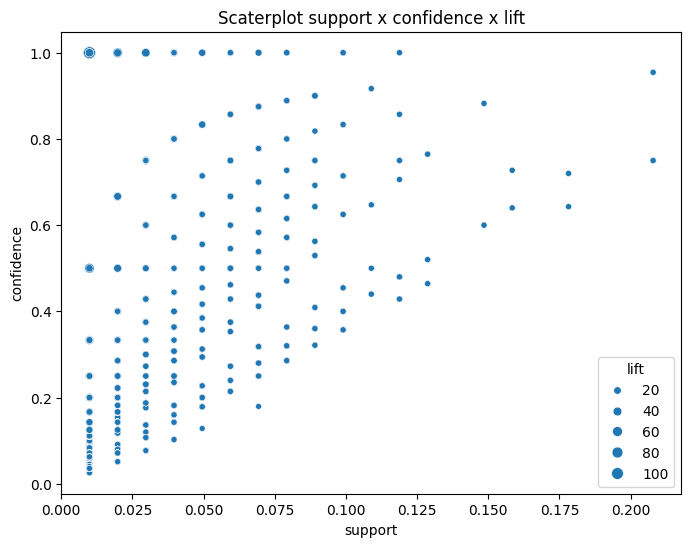

In [126]:
rules = association_rules(frequent_itemsets,
                          metric = 'support',
                          min_threshold = 0.00)
plt.figure(figsize=(8,6))
plt.title("Scaterplot support x confidence x lift")
sns.scatterplot(x = "support",
                y = "confidence",
                size = "lift",
                data = rules)
plt.show()

In [127]:
frequent_itemsets_1 = apriori(onehot_NL,
                            min_support = 0.1,
                            max_len = 2,
                            use_colnames = True )

frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets_1.head()

,support,itemsets,length
0,0.118812,(card dolly girl),1
1,0.108911,(charlotte bag pink polkadot),1
2,0.108911,(charlotte bag suki design),1
3,0.128713,(childrens apron spaceboy design),1
4,0.108911,(circus parade lunch box),1


In [128]:
len(frequent_itemsets_1)

36

In [129]:
rules_1 = association_rules(frequent_itemsets_1,
                          metric = 'support',
                          min_threshold = 0.0)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(dolly girl lunch box),(round snack boxes set of 4 fruits),0.217822,0.168317,0.108911,0.500000,2.970588,1.0,0.072248,1.663366,0.848101,0.392857,0.398810,0.573529
1,(round snack boxes set of 4 fruits),(dolly girl lunch box),0.168317,0.217822,0.108911,0.647059,2.970588,1.0,0.072248,2.216172,0.797619,0.392857,0.548771,0.573529
2,(dolly girl lunch box),(round snack boxes set of4 woodland),0.217822,0.247525,0.158416,0.727273,2.938182,1.0,0.104500,2.759076,0.843354,0.516129,0.637560,0.683636
3,(round snack boxes set of4 woodland),(dolly girl lunch box),0.247525,0.217822,0.158416,0.640000,2.938182,1.0,0.104500,2.172717,0.876645,0.516129,0.539747,0.683636
4,(spaceboy lunch box),(dolly girl lunch box),0.277228,0.217822,0.207921,0.750000,3.443182,1.0,0.147535,3.128713,0.981735,0.724138,0.680380,0.852273
5,(dolly girl lunch box),(spaceboy lunch box),0.217822,0.277228,0.207921,0.954545,3.443182,1.0,0.147535,15.900990,0.907173,0.724138,0.937111,0.852273
6,(plasters in tin spaceboy),(round snack boxes set of4 woodland),0.118812,0.247525,0.118812,1.000000,4.040000,1.0,0.089403,inf,0.853933,0.480000,1.000000,0.740000
7,(round snack boxes set of4 woodland),(plasters in tin spaceboy),0.247525,0.118812,0.118812,0.480000,4.040000,1.0,0.089403,1.694593,1.000000,0.480000,0.409888,0.740000
8,(red retrospot charlotte bag),(round snack boxes set of4 woodland),0.118812,0.247525,0.108911,0.916667,3.703333,1.0,0.079502,9.029703,0.828396,0.423077,0.889254,0.678333
9,(round snack boxes set of4 woodland),(red retrospot charlotte bag),0.247525,0.118812,0.108911,0.440000,3.703333,1.0,0.079502,1.573550,0.970096,0.423077,0.364494,0.678333


In [130]:
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda x: ','.join(list(x)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda x: ','.join(list(x)))

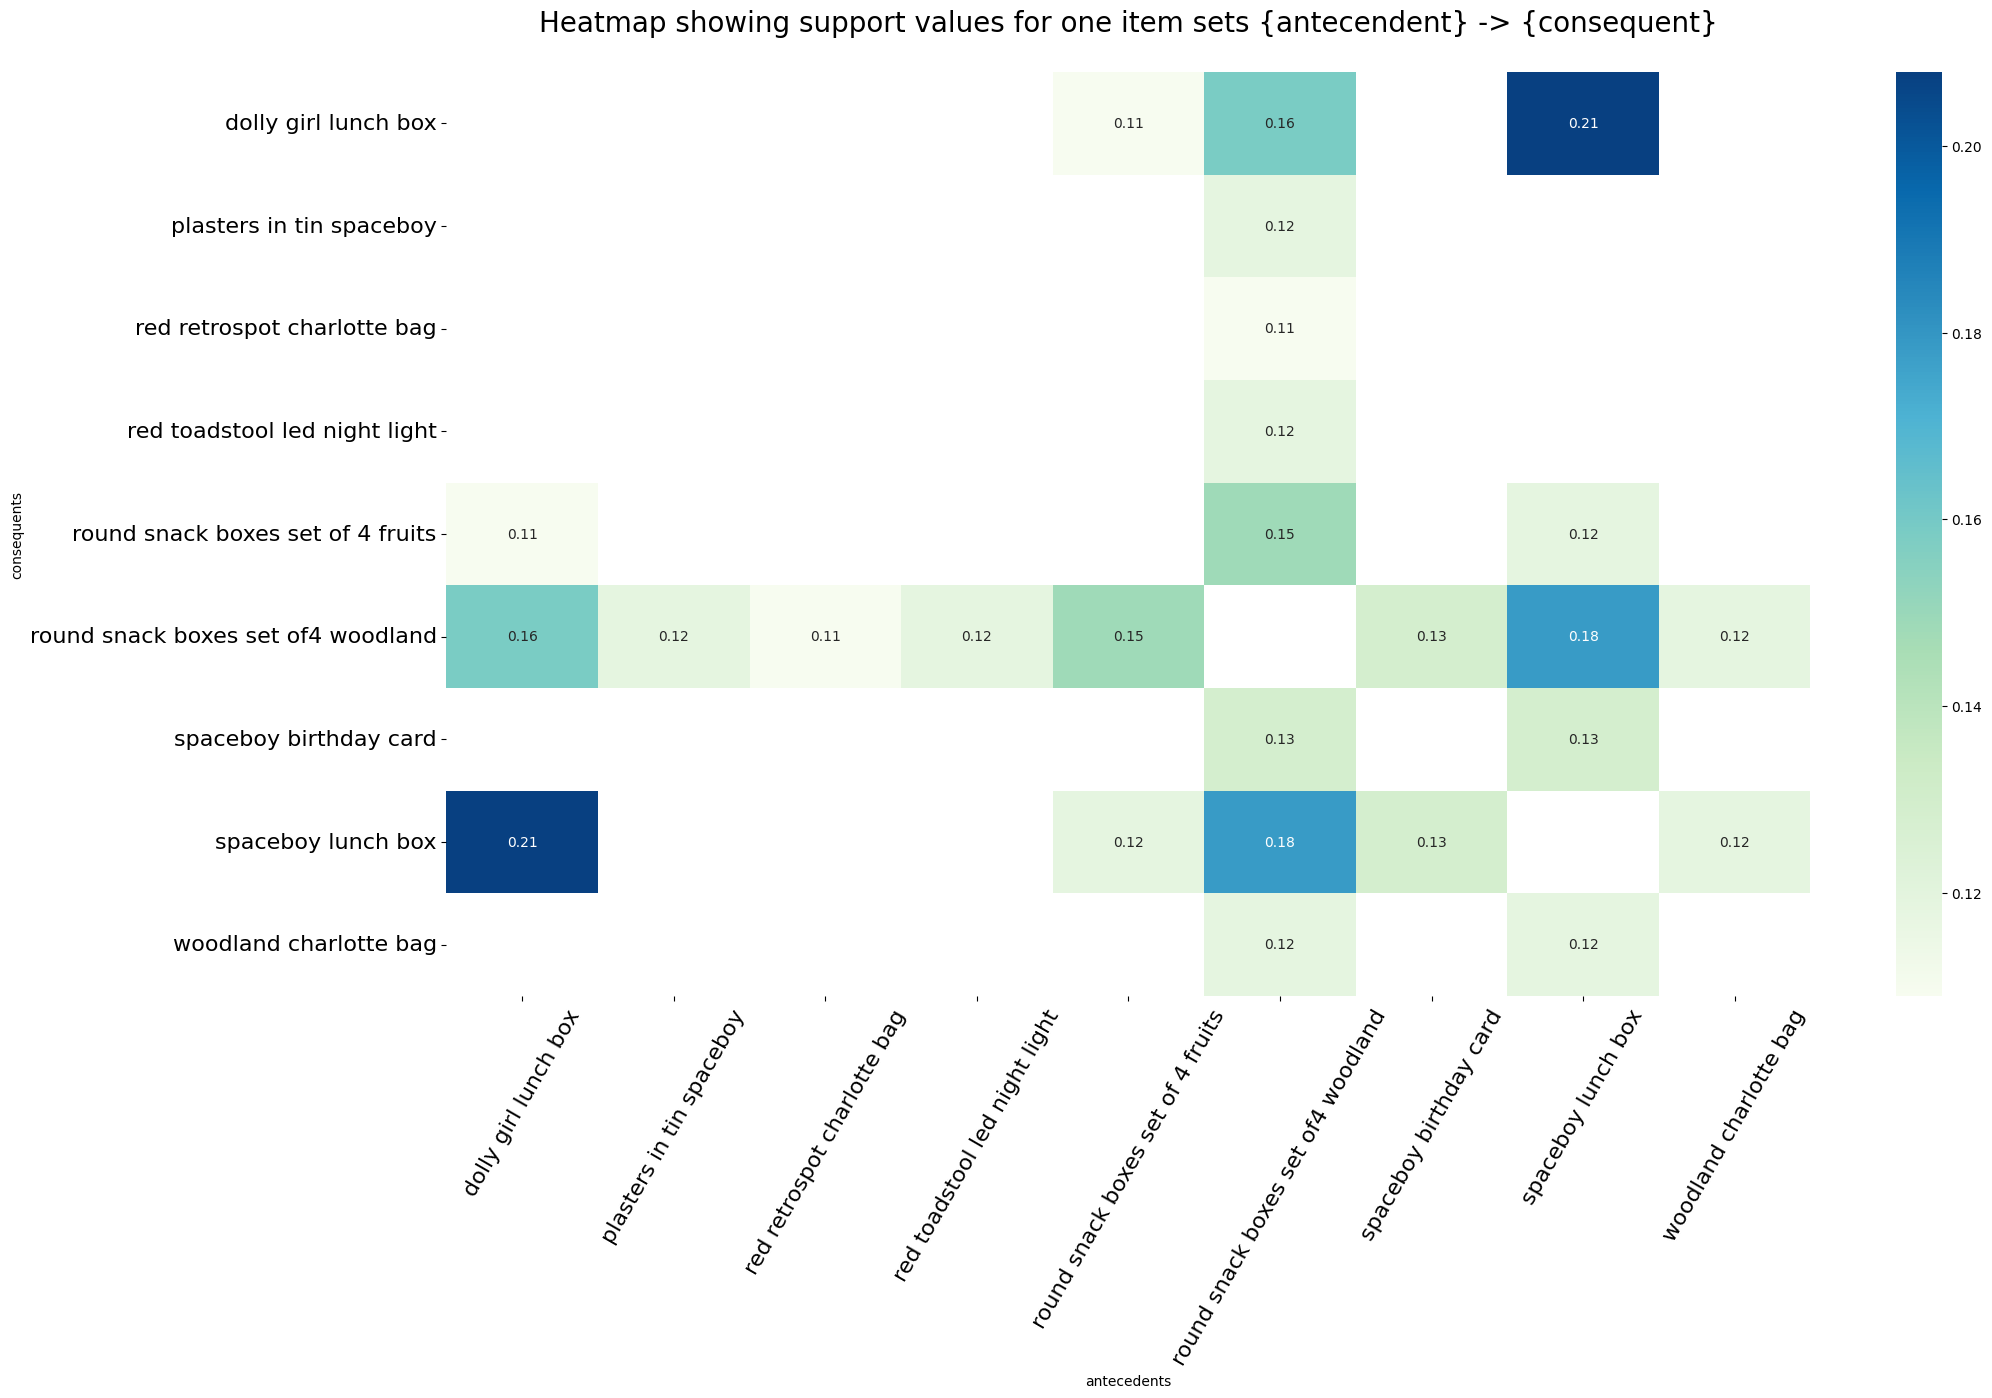

In [131]:
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='support')
plt.figure(figsize=(22,12))
plt.title("Heatmap showing support values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu')
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

In [132]:
filtered_rules_1 = rules_1[(rules_1['support'] > 0.2) &
                           (rules_1['confidence'] > 0.6) &
                           (rules_1['lift'] > 2.50)]



In [133]:
filtered_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,spaceboy lunch box,dolly girl lunch box,0.277228,0.217822,0.207921,0.750000,3.443182,1.0,0.147535,3.128713,0.981735,0.724138,0.680380,0.852273
5,dolly girl lunch box,spaceboy lunch box,0.217822,0.277228,0.207921,0.954545,3.443182,1.0,0.147535,15.900990,0.907173,0.724138,0.937111,0.852273


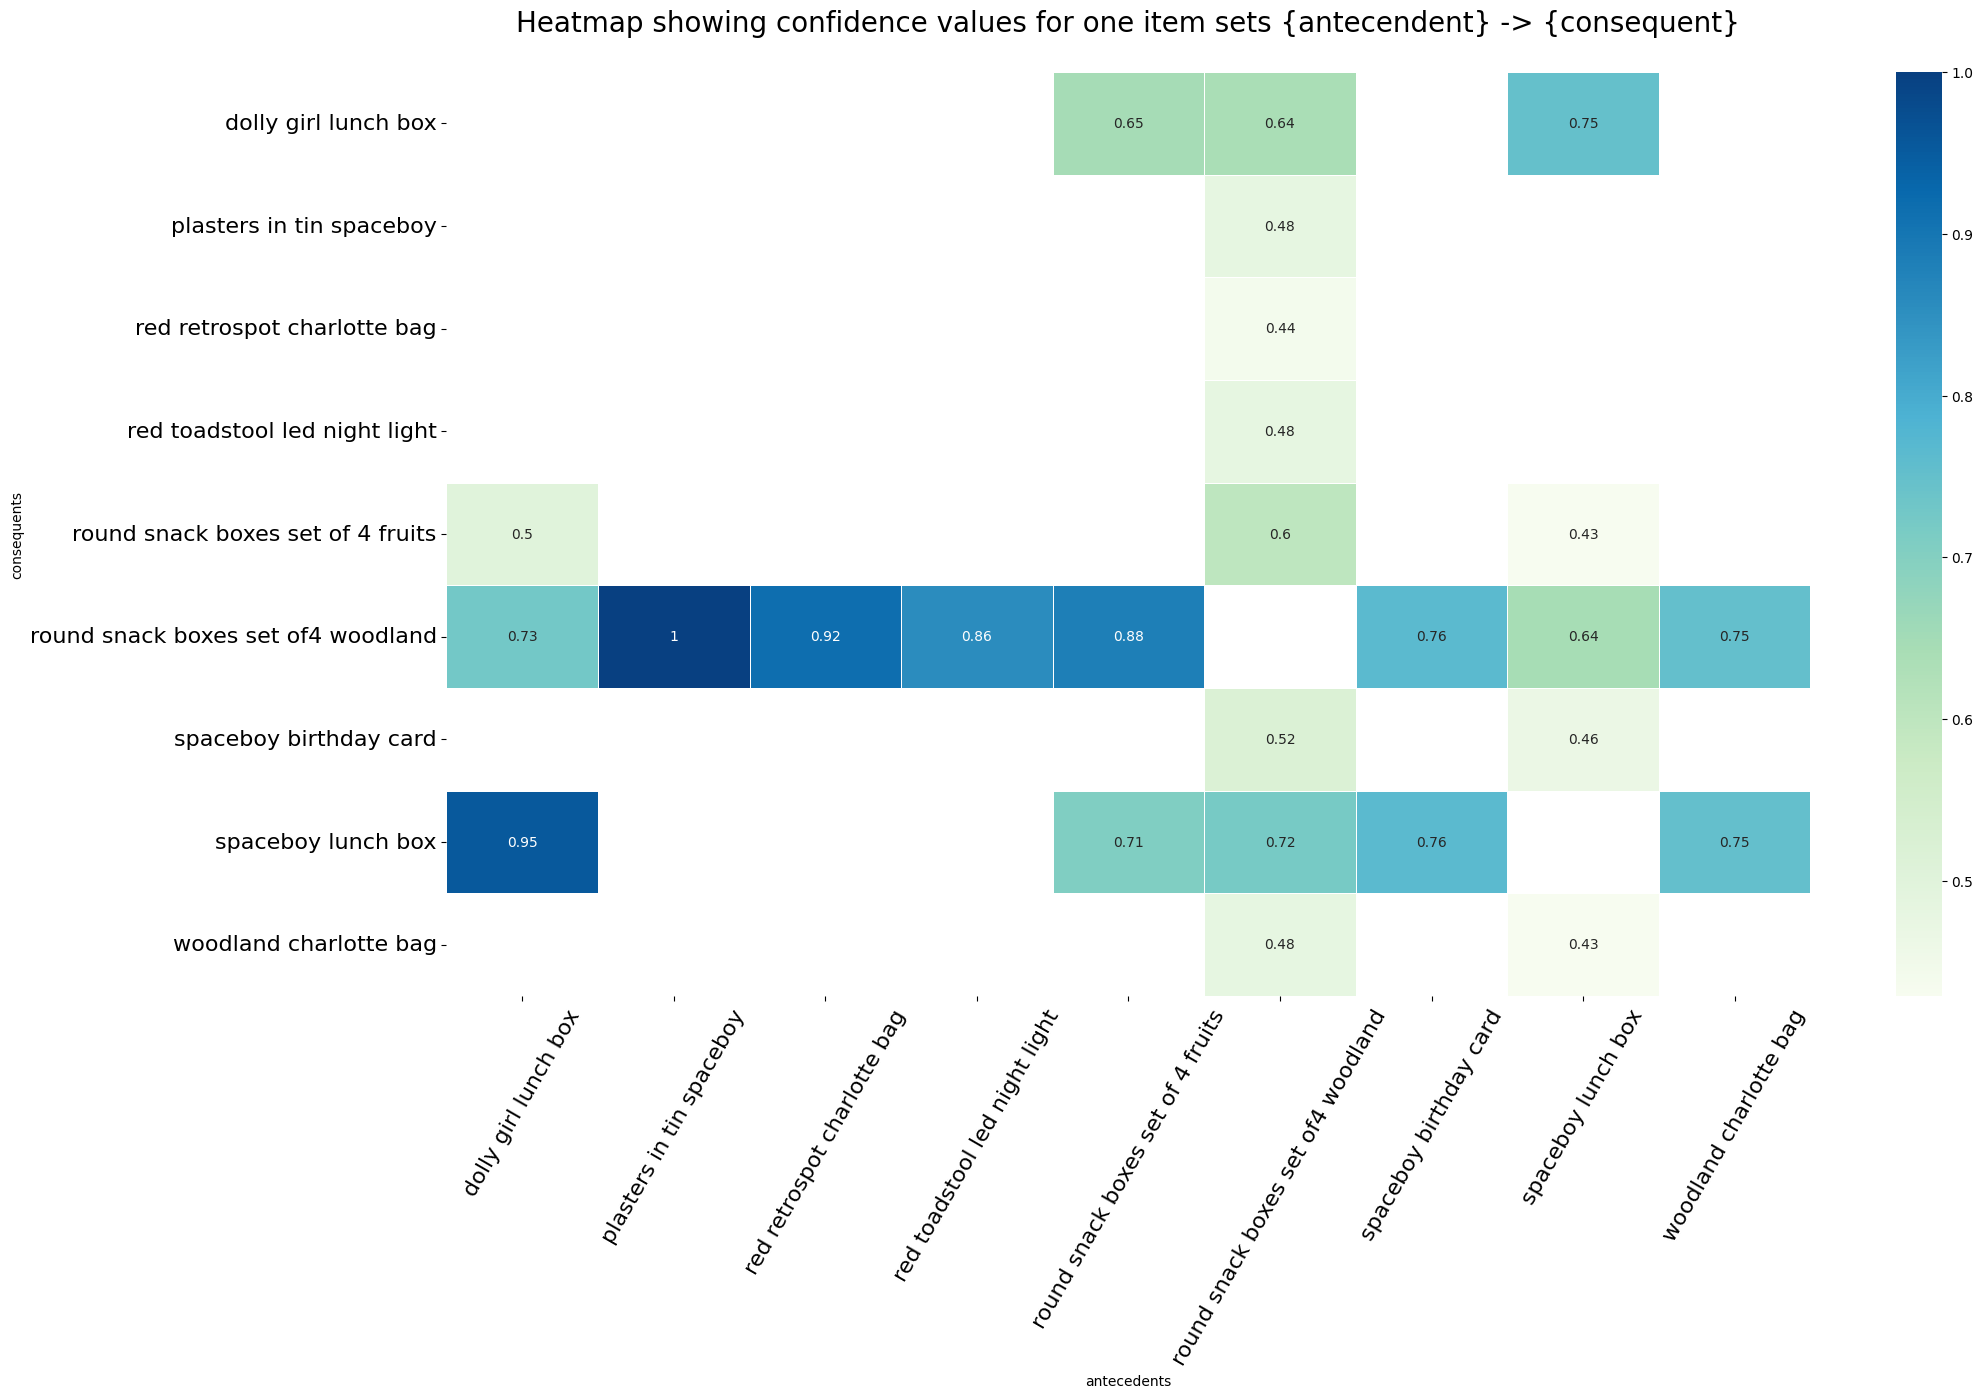

In [134]:
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='confidence')
plt.figure(figsize=(22,12))
plt.title("Heatmap showing confidence values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu',linewidths=.5)
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

In [135]:
def rules_to_coordinates(rules):

    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    coords = rules[['antecedent','consequent','rule']]

    return coords


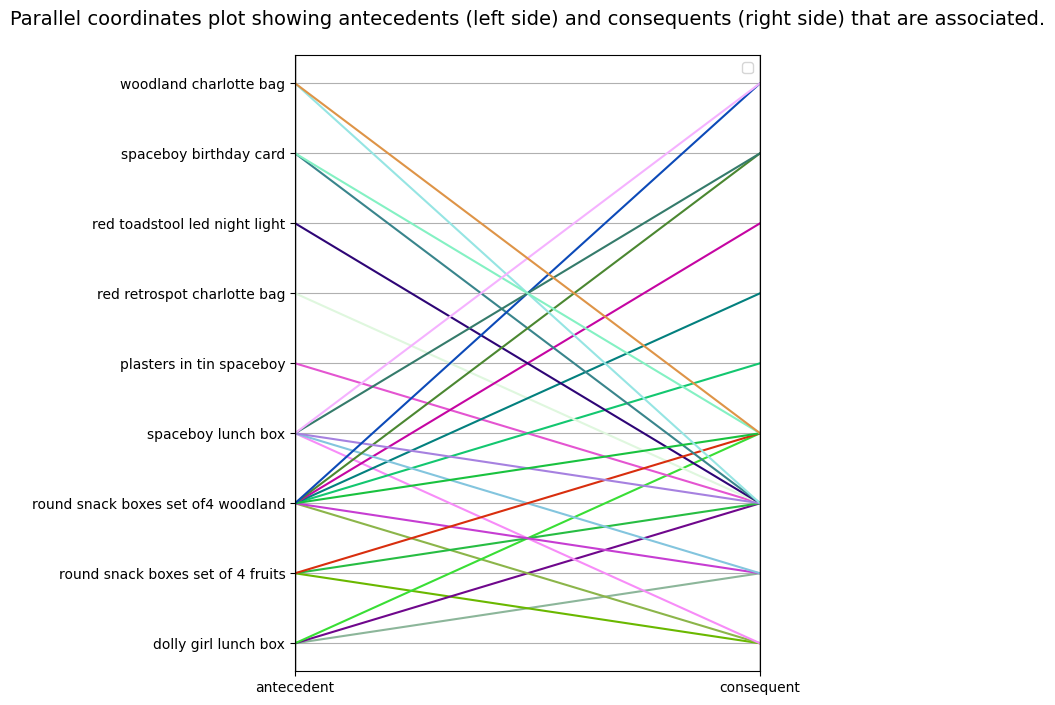

In [136]:
frequent_itemsets_1 = apriori(onehot_NL,
                            min_support = 0.1,
                            max_len = 2,
                            use_colnames = True )
rules_1 = association_rules(frequent_itemsets_1,
                          metric = 'support',
                          min_threshold = 0.0)

coords = rules_to_coordinates(rules_1)

plt.figure(figsize=(6,8))
plt.title("Parallel coordinates plot showing antecedents (left side) and consequents (right side) that are associated.\n",
          size = 14)
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.show()


In [137]:
rules_1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent,consequent,rule
0,(dolly girl lunch box),(round snack boxes set of 4 fruits),0.217822,0.168317,0.108911,0.500000,2.970588,1.0,0.072248,1.663366,0.848101,0.392857,0.398810,0.573529,dolly girl lunch box,round snack boxes set of 4 fruits,0
1,(round snack boxes set of 4 fruits),(dolly girl lunch box),0.168317,0.217822,0.108911,0.647059,2.970588,1.0,0.072248,2.216172,0.797619,0.392857,0.548771,0.573529,round snack boxes set of 4 fruits,dolly girl lunch box,1
2,(dolly girl lunch box),(round snack boxes set of4 woodland),0.217822,0.247525,0.158416,0.727273,2.938182,1.0,0.104500,2.759076,0.843354,0.516129,0.637560,0.683636,dolly girl lunch box,round snack boxes set of4 woodland,2
3,(round snack boxes set of4 woodland),(dolly girl lunch box),0.247525,0.217822,0.158416,0.640000,2.938182,1.0,0.104500,2.172717,0.876645,0.516129,0.539747,0.683636,round snack boxes set of4 woodland,dolly girl lunch box,3
4,(spaceboy lunch box),(dolly girl lunch box),0.277228,0.217822,0.207921,0.750000,3.443182,1.0,0.147535,3.128713,0.981735,0.724138,0.680380,0.852273,spaceboy lunch box,dolly girl lunch box,4
5,(dolly girl lunch box),(spaceboy lunch box),0.217822,0.277228,0.207921,0.954545,3.443182,1.0,0.147535,15.900990,0.907173,0.724138,0.937111,0.852273,dolly girl lunch box,spaceboy lunch box,5
6,(plasters in tin spaceboy),(round snack boxes set of4 woodland),0.118812,0.247525,0.118812,1.000000,4.040000,1.0,0.089403,inf,0.853933,0.480000,1.000000,0.740000,plasters in tin spaceboy,round snack boxes set of4 woodland,6
7,(round snack boxes set of4 woodland),(plasters in tin spaceboy),0.247525,0.118812,0.118812,0.480000,4.040000,1.0,0.089403,1.694593,1.000000,0.480000,0.409888,0.740000,round snack boxes set of4 woodland,plasters in tin spaceboy,7
8,(red retrospot charlotte bag),(round snack boxes set of4 woodland),0.118812,0.247525,0.108911,0.916667,3.703333,1.0,0.079502,9.029703,0.828396,0.423077,0.889254,0.678333,red retrospot charlotte bag,round snack boxes set of4 woodland,8
9,(round snack boxes set of4 woodland),(red retrospot charlotte bag),0.247525,0.118812,0.108911,0.440000,3.703333,1.0,0.079502,1.573550,0.970096,0.423077,0.364494,0.678333,round snack boxes set of4 woodland,red retrospot charlotte bag,9


In [138]:
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda x: ','.join(list(x)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda x: ','.join(list(x)))

In [139]:
targeted_rules = rules_1[rules_1['consequents'] == 'round snack boxes set of4 woodland'].copy()
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent,consequent,rule
2,dolly girl lunch box,round snack boxes set of4 woodland,0.217822,0.247525,0.158416,0.727273,2.938182,1.0,0.104500,2.759076,0.843354,0.516129,0.637560,0.683636,dolly girl lunch box,round snack boxes set of4 woodland,2
6,plasters in tin spaceboy,round snack boxes set of4 woodland,0.118812,0.247525,0.118812,1.000000,4.040000,1.0,0.089403,inf,0.853933,0.480000,1.000000,0.740000,plasters in tin spaceboy,round snack boxes set of4 woodland,6
8,red retrospot charlotte bag,round snack boxes set of4 woodland,0.118812,0.247525,0.108911,0.916667,3.703333,1.0,0.079502,9.029703,0.828396,0.423077,0.889254,0.678333,red retrospot charlotte bag,round snack boxes set of4 woodland,8
11,red toadstool led night light,round snack boxes set of4 woodland,0.138614,0.247525,0.118812,0.857143,3.462857,1.0,0.084502,5.267327,0.825670,0.444444,0.810150,0.668571,red toadstool led night light,round snack boxes set of4 woodland,11
12,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,0.168317,0.247525,0.148515,0.882353,3.564706,1.0,0.106852,6.396040,0.865079,0.555556,0.843653,0.741176,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,12
16,spaceboy birthday card,round snack boxes set of4 woodland,0.168317,0.247525,0.128713,0.764706,3.089412,1.0,0.087050,3.198020,0.813187,0.448276,0.687307,0.642353,spaceboy birthday card,round snack boxes set of4 woodland,16
18,spaceboy lunch box,round snack boxes set of4 woodland,0.277228,0.247525,0.178218,0.642857,2.597143,1.0,0.109597,2.106931,0.850837,0.514286,0.525376,0.681429,spaceboy lunch box,round snack boxes set of4 woodland,18
20,woodland charlotte bag,round snack boxes set of4 woodland,0.158416,0.247525,0.118812,0.750000,3.030000,1.0,0.079600,3.009901,0.796078,0.413793,0.667763,0.615000,woodland charlotte bag,round snack boxes set of4 woodland,20


In [140]:
filtered_rules = targeted_rules[(targeted_rules['antecedent support'] > 0.13) &
                                (targeted_rules['support'] > 0.12) &
                                (targeted_rules['confidence'] > 0.7) &
                                (targeted_rules['lift'] > 3.50)]


In [141]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent,consequent,rule
12,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,0.168317,0.247525,0.148515,0.882353,3.564706,1.0,0.106852,6.39604,0.865079,0.555556,0.843653,0.741176,round snack boxes set of 4 fruits,round snack boxes set of4 woodland,12


In [142]:
def aggregate(onehot, item):


    item_headers = [i for i in onehot.columns if i.lower().find(item)>=0]

    item_columns = onehot[item_headers]
    return item_columns.sum(axis = 1) >= 1.0
vintage = aggregate(onehot_NL,'vintage')
christmas = aggregate(onehot_NL,'christmas')
party = aggregate(onehot_NL,'party')
bags = aggregate(onehot_NL,'bag')
candles = aggregate(onehot_NL,'candle')
boxes = aggregate(onehot_NL,'box')

In [143]:
print('Support of vintages: %.2f' % vintage.mean())
print('Support of christmas: %.2f' % christmas.mean())
print('Support of party: %.2f' % party.mean())
print('Support of bags: %.2f' % bags.mean())
print('Support of candles: %.2f' % candles.mean())
print('Support of boxes: %.2f' % boxes.mean())

Support of vintages: 0.36
Support of christmas: 0.25
Support of party: 0.28
Support of bags: 0.53
Support of candles: 0.22
Support of boxes: 0.51


In [144]:
aggregated = pd.DataFrame(np.vstack([bags,boxes,candles,christmas,party,vintage]).T, columns = ['bags','boxes','candles','christmas','party','vintage'])

In [145]:
aggregated


,bags,boxes,candles,christmas,party,vintage
0,False,False,False,False,False,False
1,True,False,True,False,True,False
2,True,True,False,False,True,False
3,True,True,True,False,True,True
4,True,True,True,False,True,True
...,...,...,...,...,...,...
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False
99,False,False,False,False,False,False


In [146]:
frequent_itemsets = apriori(aggregated,
                            min_support = 0.005,
                            use_colnames = True,
                            max_len = 2)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets.head()

,support,itemsets,length
0,0.534653,(bags),1
1,0.514851,(boxes),1
2,0.217822,(candles),1
3,0.247525,(christmas),1
4,0.277228,(party),1


In [147]:
len(frequent_itemsets)

21

In [148]:
rules = association_rules(frequent_itemsets,
                          metric = 'lift',
                          min_threshold = 1.00)

In [149]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(boxes),(bags),0.514851,0.534653,0.396040,0.769231,1.438746,1.0,0.120772,2.016502,0.628571,0.606061,0.504092,0.754986
1,(bags),(boxes),0.534653,0.514851,0.396040,0.740741,1.438746,1.0,0.120772,1.871287,0.655319,0.606061,0.465608,0.754986
2,(bags),(candles),0.534653,0.217822,0.188119,0.351852,1.615320,1.0,0.071660,1.206789,0.818589,0.333333,0.171355,0.607744
3,(candles),(bags),0.217822,0.534653,0.188119,0.863636,1.615320,1.0,0.071660,3.412541,0.487009,0.333333,0.706963,0.607744
4,(christmas),(bags),0.247525,0.534653,0.168317,0.680000,1.271852,1.0,0.035977,1.454208,0.284056,0.274194,0.312340,0.497407
5,(bags),(christmas),0.534653,0.247525,0.168317,0.314815,1.271852,1.0,0.035977,1.098207,0.459324,0.274194,0.089425,0.497407
6,(bags),(party),0.534653,0.277228,0.247525,0.462963,1.669974,1.0,0.099304,1.345852,0.862128,0.438596,0.256976,0.677910
7,(party),(bags),0.277228,0.534653,0.247525,0.892857,1.669974,1.0,0.099304,4.343234,0.555068,0.438596,0.769757,0.677910
8,(bags),(vintage),0.534653,0.356436,0.277228,0.518519,1.454733,1.0,0.086658,1.336634,0.671733,0.451613,0.251852,0.648148
9,(vintage),(bags),0.356436,0.534653,0.277228,0.777778,1.454733,1.0,0.086658,2.094059,0.485714,0.451613,0.522459,0.648148


In [150]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ','.join(list(x)))


In [151]:
zhang_list = []
for antecedent,consequent in zip(rules['antecedents'],rules['consequents']):
    zhang_list.append(zhang(aggregated[antecedent], aggregated[consequent]))


In [152]:
rules['zhang'] = zhang_list

In [153]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,zhang
0,boxes,bags,0.514851,0.534653,0.396040,0.769231,1.438746,1.0,0.120772,2.016502,0.628571,0.606061,0.504092,0.754986,0.6286
1,bags,boxes,0.534653,0.514851,0.396040,0.740741,1.438746,1.0,0.120772,1.871287,0.655319,0.606061,0.465608,0.754986,0.6553
2,bags,candles,0.534653,0.217822,0.188119,0.351852,1.615320,1.0,0.071660,1.206789,0.818589,0.333333,0.171355,0.607744,0.8186
3,candles,bags,0.217822,0.534653,0.188119,0.863636,1.615320,1.0,0.071660,3.412541,0.487009,0.333333,0.706963,0.607744,0.4870
4,christmas,bags,0.247525,0.534653,0.168317,0.680000,1.271852,1.0,0.035977,1.454208,0.284056,0.274194,0.312340,0.497407,0.2841
5,bags,christmas,0.534653,0.247525,0.168317,0.314815,1.271852,1.0,0.035977,1.098207,0.459324,0.274194,0.089425,0.497407,0.4593
6,bags,party,0.534653,0.277228,0.247525,0.462963,1.669974,1.0,0.099304,1.345852,0.862128,0.438596,0.256976,0.677910,0.8621
7,party,bags,0.277228,0.534653,0.247525,0.892857,1.669974,1.0,0.099304,4.343234,0.555068,0.438596,0.769757,0.677910,0.5551
8,bags,vintage,0.534653,0.356436,0.277228,0.518519,1.454733,1.0,0.086658,1.336634,0.671733,0.451613,0.251852,0.648148,0.6717
9,vintage,bags,0.356436,0.534653,0.277228,0.777778,1.454733,1.0,0.086658,2.094059,0.485714,0.451613,0.522459,0.648148,0.4857


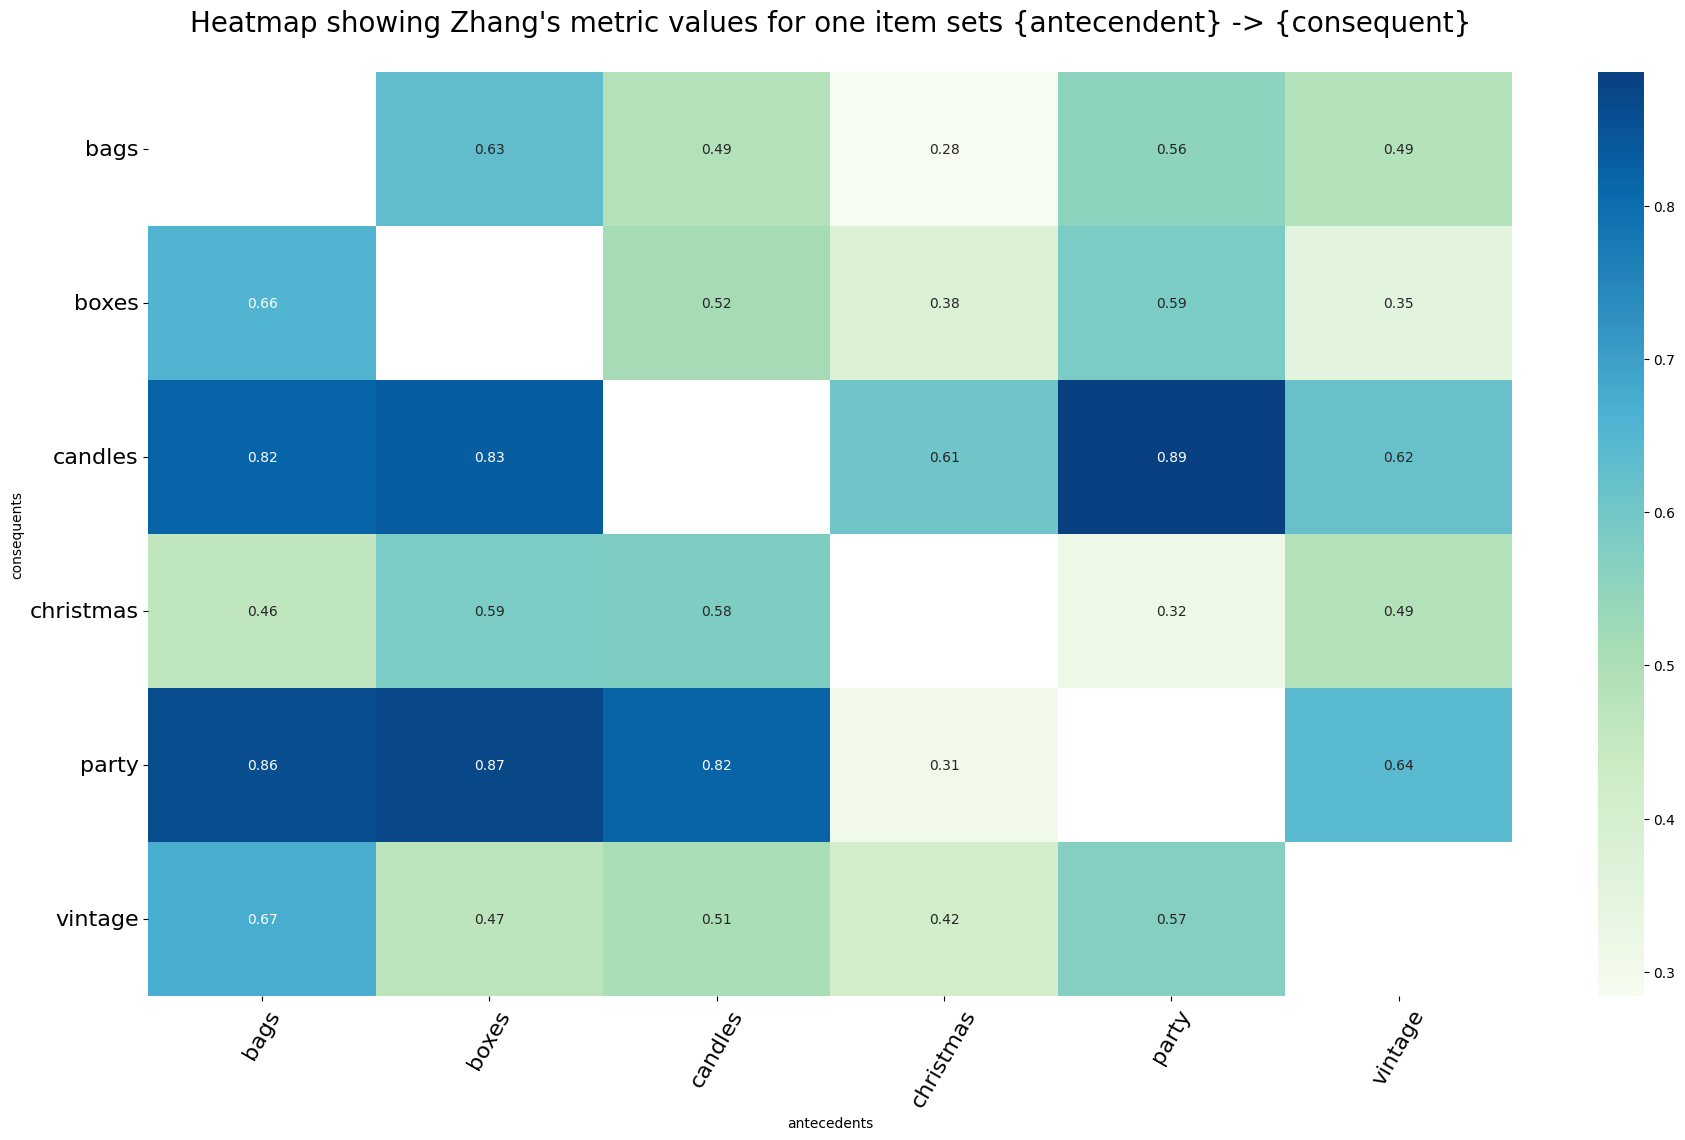

In [154]:
pivot = rules.pivot(index='consequents', columns='antecedents', values='zhang')
plt.figure(figsize=(22,12))
plt.title("Heatmap showing Zhang's metric values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='GnBu')
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

In [155]:
filtered_rules = rules[(rules['antecedent support'] > 0.2) &
                           (rules['consequent support'] > 0.2) &
                           (rules['zhang'] > 0.5)]

In [156]:
filtered_rules_sorted = filtered_rules.sort_values('zhang')
filtered_rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,zhang
23,candles,vintage,0.217822,0.356436,0.128713,0.590909,1.657828,1.0,0.051073,1.573157,0.507303,0.288889,0.364336,0.476010,0.5073
11,candles,boxes,0.217822,0.514851,0.188119,0.863636,1.677448,1.0,0.075973,3.557756,0.516322,0.345455,0.718924,0.614510,0.5163
7,party,bags,0.277228,0.534653,0.247525,0.892857,1.669974,1.0,0.099304,4.343234,0.555068,0.438596,0.769757,0.677910,0.5551
29,party,vintage,0.277228,0.356436,0.168317,0.607143,1.703373,1.0,0.069503,1.638164,0.571313,0.361702,0.389560,0.539683,0.5713
19,candles,christmas,0.217822,0.247525,0.099010,0.454545,1.836364,1.0,0.045094,1.379538,0.582278,0.270270,0.275120,0.427273,0.5823
15,party,boxes,0.277228,0.514851,0.247525,0.892857,1.734203,1.0,0.104794,4.528053,0.585753,0.454545,0.779155,0.686813,0.5858
13,boxes,christmas,0.514851,0.247525,0.178218,0.346154,1.398462,1.0,0.050779,1.150844,0.587302,0.305085,0.131073,0.533077,0.5873
18,christmas,candles,0.247525,0.217822,0.099010,0.400000,1.836364,1.0,0.045094,1.303630,0.605263,0.270270,0.232911,0.427273,0.6053
22,vintage,candles,0.356436,0.217822,0.128713,0.361111,1.657828,1.0,0.051073,1.224279,0.616568,0.288889,0.183193,0.476010,0.6166
0,boxes,bags,0.514851,0.534653,0.396040,0.769231,1.438746,1.0,0.120772,2.016502,0.628571,0.606061,0.504092,0.754986,0.6286
